<h1 style="text-align:center;color:#189D9D">Département Génie Informatique, FST de Tanger, MST MDB/SIM (M. AIT KBIR)</h1> 
<h2 style="text-align:center;"> Module "Apprentissage automatique". Perceptron multi-couches.</h2>

<p style="text-align:center;"><Strong style="font-size:15px;">Prédiction du mouvement des prix dans l'indice S&P 500</Strong>: Développer une application pour implémenter les solutions apportées par les modèles</p>

 <h3 style='color:#50B5B5;margin-left:4%'>Réalisé par:</h3>
 <ul style='list-style-type: circle;margin-left:6%'>
  <li> ACHATIBI Hajar</li>
  <li> DAROUY Chaimae</li>
  <li> FILAL Imane</li>
</ul>

<h3 style='color:#189D9D;margin-left:4%'>Sujet 1:</h3>

Problème de prédiction du mouvement des prix dans l'indice S&P 500, à partir des valeurs 
antérieures de l’indice. Le S&P 500 est un indice boursier basé sur 500 grandes sociétés cotées 
sur les bourses américaines. L'indice est possédé et géré par Standard & Poor's, l'une des trois 
principales sociétés de notation financière du marché boursier américain. Lien de récupération 
des données : https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

<h2 style="color:#9D181A">1- Installation des packages:</h2>

Ajouter les bibliothèques nécessaires. 

In [2]:
!python -m pip install pandas_datareader

<h2 style="color:#9D181A">2- Manipulation des données:</h2>
<h3 style="color:#189D3C">2.1- Imporation des librairies</h3>
Au cours de ce projet, 

In [84]:
import pandas as pd 
import numpy as np 
import pandas_datareader as pdr
import matplotlib.pyplot as plt

from datetime import datetime

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

<h3 style="color:#189D3C">2.2- Chargement des données</h3>

<p>Télècharger les données, en utilisant la fonction <strong style="color:red;font-style: italic;">DataReader()</strong> qui prend comme arguments: Le symbole boursier à rechercher sous forme de chaîne dans notre cas c'est <strong style="color:blue">'^GSPC'</strong>, ensuite le site web <strong style="color:blue">'yahoo'</strong> et finalemment le début et la fin des informations, qui sont présentées par des dates, commençons par <strong style="color:blue">'2000-01-01'</strong> et finissant par <strong style="color:blue">'2005-01-01'</strong>.</p>

In [74]:
start = datetime(2000, 1, 1)
end = datetime(2005, 1, 1)
sp_data = pdr.DataReader('^GSPC', 'yahoo', start, end)
# Verify loaded data by displaying the 5 first rows
sp_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


Exporter les données dans un fichier <strong style="font-style: italic;">.CSV</strong> pour le bon enregistrement des données.

In [39]:
sp_data.to_csv(r'sp_data.csv', index = True)
sp_data= pd.read_csv(r'sp_data.csv', index_col='Date', parse_dates=True)

Vérifier si les données sont bien télècharger à l'aide de la fonction <strong style="color:red;font-style: italic;">head()</strong> qui affiche les 5 premier lignes du dataFrame. 

In [75]:
# Verify loaded data by displaying the 5 first rows
sp_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


Afficher les élèmenets de l'index du data.

In [49]:
sp_data.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2004-12-17', '2004-12-20', '2004-12-21', '2004-12-22',
               '2004-12-23', '2004-12-27', '2004-12-28', '2004-12-29',
               '2004-12-30', '2004-12-31'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)

<h3 style="color:#189D3C">2.3-Visualisation des données</h3>

Tracer le graphe correspondant au dataframe.

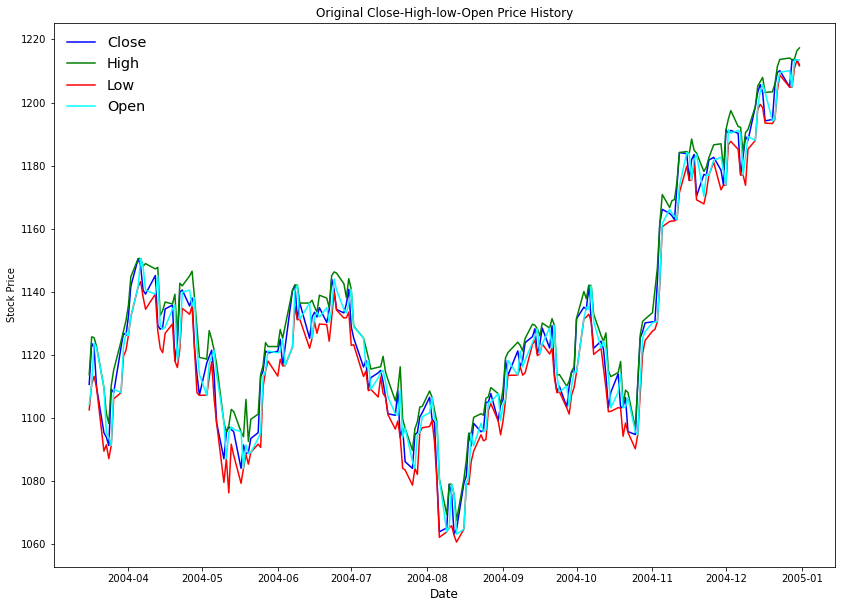

In [76]:
#--------------------------------------------plotting original data-------------------------------------
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue",label='Close')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Original Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="green",label='High')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="red",label='Low')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="cyan",label='Open')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

<h3 style="color:#189D3C">2.4-Préparation des données</h3>

Normaliser le nouvel ensemble de données: Nous utiliserons le <strong style="color:red;font-style: italic;">MinMaxScaler</strong> pour mettre nos données à <strong>l'échelle entre zéro et un</strong>. En termes plus simples, la mise à l'échelle convertit les données numériques représentées dans une large plage en une plus petite.

In [78]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_array = scaler.fit_transform(sp_data)

# Convert scaled array to dataframe form
df = pd.DataFrame(scaled_array, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])

# Add initial dataframe index to scaled one
df.index = sp_data.index

# Verify loaded data by displaying the 5 first rows
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,0.900745,0.893176,0.922459,0.903770,0.237955,0.903770
2000-01-04,0.870546,0.838590,0.903770,0.829439,0.269863,0.829439
2000-01-05,0.814933,0.812251,0.829439,0.833023,0.301481,0.833023
2000-01-06,0.813116,0.831482,0.833023,0.834807,0.304291,0.834807
2000-01-07,0.852317,0.842991,0.834807,0.885454,0.359220,0.885454


Transformer dataframe en tableau <strong>(np.array)</strong>

In [79]:
df = df.values
# Display result
df

array([[0.90074505, 0.89317581, 0.92245909, 0.90376982, 0.23795511,
        0.90376982],
       [0.87054563, 0.83859019, 0.90376982, 0.82943929, 0.26986266,
        0.82943929],
       [0.81493269, 0.81225089, 0.82943929, 0.83302253, 0.30148089,
        0.83302253],
       ...,
       [0.55056207, 0.58989367, 0.58183037, 0.58171036, 0.23551658,
        0.58171036],
       [0.55403539, 0.59317453, 0.58171036, 0.5818437 , 0.19579746,
        0.5818437 ],
       [0.55517547, 0.59082731, 0.5818437 , 0.57967239, 0.17806645,
        0.57967239]])

Séparer les données en ensembles d'entraînement et de test:

In [80]:
# 80% for training data
dataset_train = np.array(df[:int(df.shape[0]*0.8)])

# 20% for testing the data
dataset_test = np.array(df[int(df.shape[0]*0.8):])

Créer la fonction qui définit les dataSets: plus présisemment, pour les caractéristiques (x),<strong> ajouter les 50 derniers prix</strong>, et pour l'étiquette (y),<strong> ajouter le prix suivant</strong>. Ensuite, utiliser numpy pour le convertir en un tableau (np.array).

In [81]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, :6])
        y.append(df[i, :6])
    x = np.array(x)
    y = np.array(y)

    return x,y

Créer les données d'entraînement et de test en appelant la fonction <strong style="color:red;font-style: italic;">create_dataset()</strong> pour chacune :

In [57]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Remodeler les données pour en faire un tableau 3D afin de les utiliser dans la couche LSTM

In [58]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

<h3 style="color:#189D3C">2.3-Traitement des données</h3>

<strong style="color:blue;">Construire le modèle</strong>:

Initialiser le modèle en tant que modèle séquentiel avec 96 unités dans la dimensionnalité de la sortie. Utiliser <strong style="color:#50B5B5;font-style: italic;">return_sequences=True </strong>pour former une couche LSTM d'entrée tridimensionnelle et <strong style="color:#50B5B5;font-style: italic;">input_shapede</strong> modeler l'ensemble de données.

Faire de la fraction de  <strong style="color:#50B5B5;font-style: italic;">Dropout</strong> 0,2 minimiser 20% des couches. Enfin, ajouter une couche dense avec une valeur de 6 car nous voulons sortir six valeur.

In [82]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=6))

Remodeler les fonctionnalité pour la couche LSTM, car c'est <strong style="color:#50B5B5;font-style: italic;">sequential_3</strong> qui attend 3 dimensions, et non pas 2 : 

In [60]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 6))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 6))

Compiler le modèle en utilisant <strong style="color:#50B5B5;font-style: italic;">loss='mean_squared_error'</strong> car il s'agit d'un problème de régression et l'optimiseur <strong style="color:#50B5B5;font-style: italic;"> Adam</strong> pour mettre à jour les poids du réseau de manière itérative en fonction des données d'apprentissage.

In [86]:
model.compile(loss='mean_squared_error', optimizer='adam')

Commencer l'entraînement: Chaque <strong style="color:#50B5B5;font-style: italic;">epoch</strong> fait référence à un cycle à travers l'ensemble de données d'entraînement complet et <strong style="color:#50B5B5;font-style: italic;">batch size</strong> fait référence au nombre d'exemples d'entraînement utilisés dans une itération.

In [87]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Save model
model.save('stock_prediction.h5')

Epoch 1/50
30/30 [==============================] - 33s 309ms/step - loss: 0.0813
Epoch 2/50
30/30 [==============================] - 9s 304ms/step - loss: 0.0113
Epoch 3/50
30/30 [==============================] - 9s 285ms/step - loss: 0.0094
Epoch 4/50
30/30 [==============================] - 9s 312ms/step - loss: 0.0103
Epoch 5/50
30/30 [==============================] - 9s 296ms/step - loss: 0.0075
Epoch 6/50
30/30 [==============================] - 10s 320ms/step - loss: 0.0087
Epoch 7/50
30/30 [==============================] - 9s 307ms/step - loss: 0.0083
Epoch 8/50
30/30 [==============================] - 9s 282ms/step - loss: 0.0080
Epoch 9/50
30/30 [==============================] - 8s 278ms/step - loss: 0.0073
Epoch 10/50
30/30 [==============================] - 9s 299ms/step - loss: 0.0073
Epoch 11/50
30/30 [==============================] - 9s 300ms/step - loss: 0.0065
Epoch 12/50
30/30 [==============================] - 9s 292ms/step - loss: 0.0077
Epoch 13/50
30/30 [====

Charger le modèle

In [88]:
model = load_model('stock_prediction.h5')

<h2 style="color:#9D181A">3- Visualisation des résultats:</h2>

Prédire le prix du stock de <strong style="color:#50B5B5;font-style: italic;">'2004-03-16'</strong> jusqu'à <strong style="color:#50B5B5;font-style: italic;">'2004-12-31'</strong> (20% du total des données)

In [89]:
predictions = model.predict(x_test)

# Inverse scaler
predictions = scaler.inverse_transform(predictions)

# Convert prediction array to dataframe
df_Result = pd.DataFrame(predictions, columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'])

# Add last 20% (test_data) of initial dataframe index as an index for the result dataframe
df_Result.index = sp_data.index[1054:]
df_Result

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-03-16,1116.325317,1097.729980,1104.854492,1106.998535,1.405352e+09,1107.906128
2004-03-17,1115.172241,1095.855103,1103.406494,1105.062866,1.411854e+09,1106.166626
2004-03-18,1117.740356,1097.816162,1105.813599,1106.757446,1.405974e+09,1108.183838
2004-03-19,1122.899170,1102.599243,1110.973755,1111.146729,1.390070e+09,1112.953247
2004-03-22,1125.894653,1105.620605,1114.146606,1113.902954,1.375802e+09,1115.970093
...,...,...,...,...,...,...
2004-12-27,1215.697998,1194.735352,1203.678223,1203.109375,1.303464e+09,1204.404297
2004-12-28,1224.600342,1203.905029,1212.828491,1211.880493,1.275366e+09,1213.533203
2004-12-29,1228.002563,1207.945801,1216.584473,1215.652344,1.253147e+09,1217.576904


Représenter les données prédites.

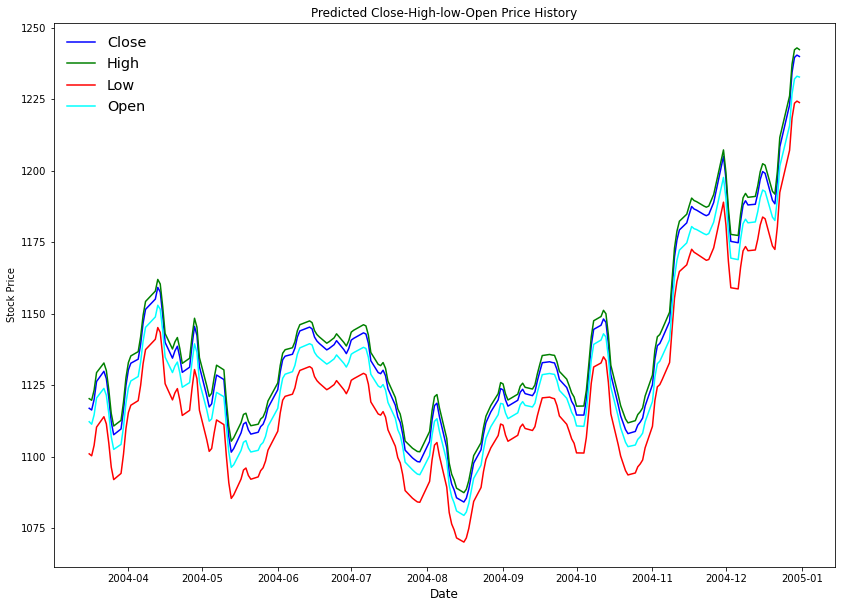

In [65]:
#--------------------------------------------plotting Predicted data-------------------------------------
f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(df_Result.index, df_Result["Close"], color="blue", label='Close')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Predicted Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["High"], color="green", label='High')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax1.plot(df_Result.index, df_Result["Low"], color="red", label='Low')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax1.plot(df_Result.index, df_Result["Open"], color="cyan", label='Open')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

ax1.legend(loc='upper left', frameon=False, fontsize='x-large')


Représenter les données originales.

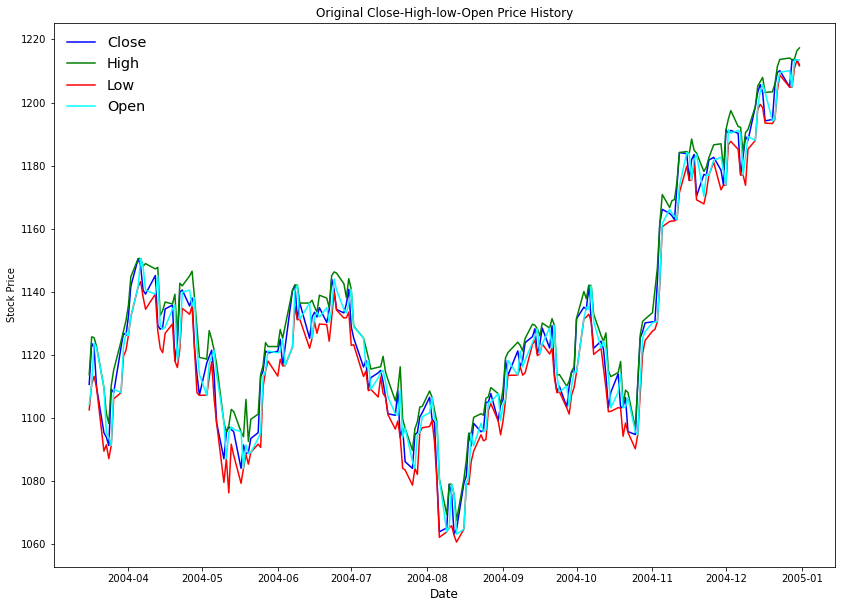

In [130]:
#--------------------------------------------plotting original data-------------------------------------

f, (ax1) = plt.subplots(1, figsize=(14,10))

# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue",label='Close')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Original Close-High-low-Open Price History")

# Second Subplot:"High Price History"
ax1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="green",label='High')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
ax1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="red",label='Low')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
ax1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="cyan",label='Open')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

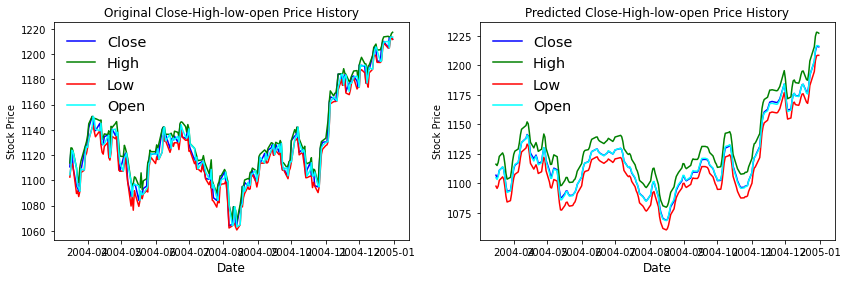

In [90]:
#--------------------------------------------plotting Original+Predicted data-------------------------------------

g, (bx1, bx2) = plt.subplots(1,2, figsize=(14,4))

#-----------------------------------------OriginaL----------------------------------
# First Subplot:"Close Price History"
bx1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue", label='Close')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.set_title("Original Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="green", label='High')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="red", label='Low')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="cyan", label='Open')
bx1.set_xlabel("Date", fontsize=12)
bx1.set_ylabel("Stock Price")
bx1.legend(loc='upper left', frameon=False, fontsize='x-large')

#-----------------------------------------Predicted----------------------------------
# First Subplot:"Close Price History"
bx2.plot(df_Result.index, df_Result["Close"], color="blue", label='Close')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.set_title("Predicted Close-High-low-open Price History")

# Second Subplot:"High Price History"
bx2.plot(df_Result.index, df_Result["High"], color="green", label='High')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Third Subplot:Low Price History"
bx2.plot(df_Result.index, df_Result["Low"], color="red", label='Low')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")

# Forth Subplot:Open Price History"
bx2.plot(df_Result.index, df_Result["Open"], color="cyan" , label='Open')
bx2.set_xlabel("Date", fontsize=12)
bx2.set_ylabel("Stock Price")
bx2.legend(loc='upper left', frameon=False, fontsize='x-large')

plt.show()

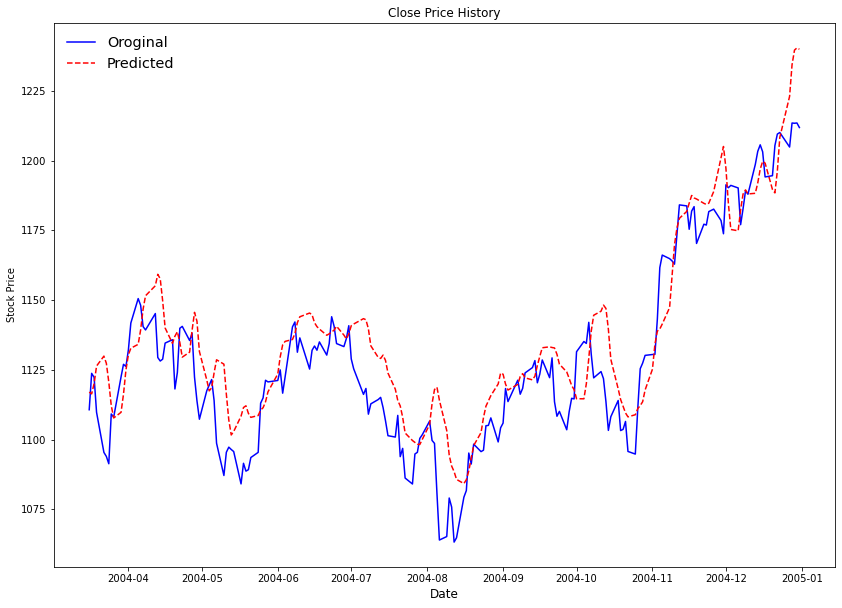

In [67]:
#--------------------------------------------plotting Original+Predicted Close-------------------------------------
f, (ax1) = plt.subplots(1, figsize=(14,10))

#-------------------original----------------------
# First Subplot:"Close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Close"][1054:], color="blue", label ='Oroginal')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Close Price History")

#-------------------predicted----------------------
# Second Subplot:"Close Price History"
ax1.plot(df_Result.index, df_Result["Close"], 'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

Text(0, 0.5, 'Stock Price')

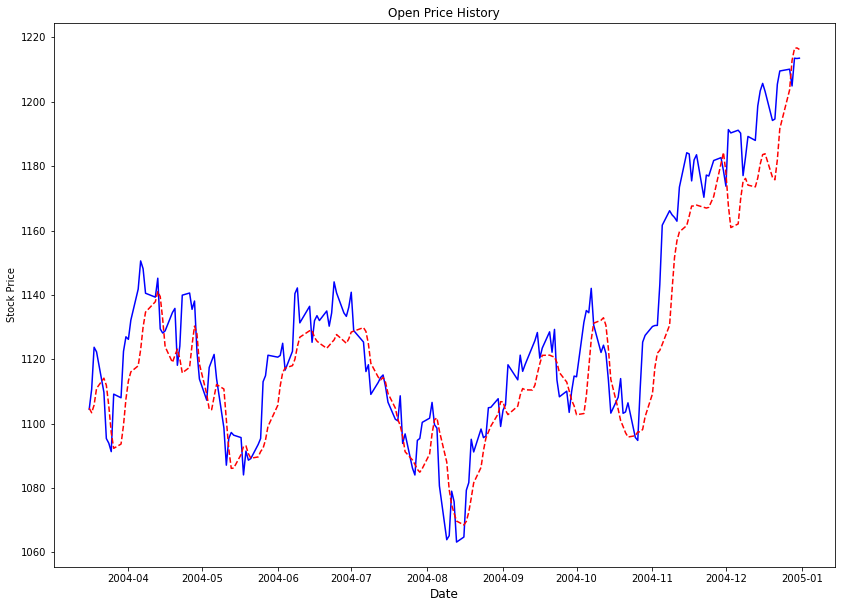

In [91]:
#--------------------------------------------plotting Original+Predicted Open-------------------------------------
f, (ax1) = plt.subplots(1, figsize=(14,10))

#-------------------original----------------------
# First Subplot:"Open Price History"
ax1.plot(sp_data.index[1054:], sp_data["Open"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Open Price History")

#-------------------predicted----------------------
# Second Subplot:"Open Price History"
ax1.plot(df_Result.index, df_Result["Open"], 'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")

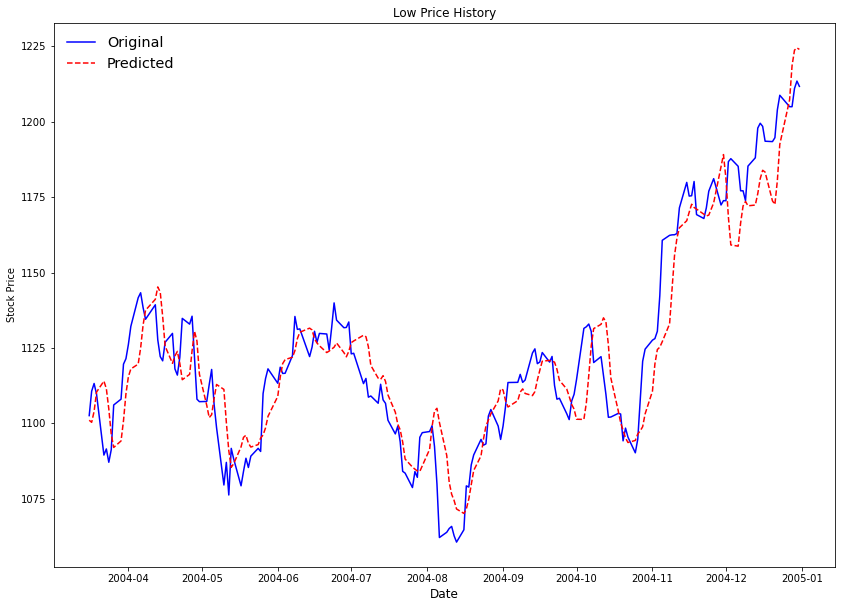

In [69]:
#--------------------------------------------plotting Original+Predicted Low-------------------------------------
f, (ax1) = plt.subplots(1, figsize=(14,10))

#-------------------original----------------------
# First Subplot:"Low Price History"
ax1.plot(sp_data.index[1054:], sp_data["Low"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Low Price History")

#-------------------predicted----------------------
# Second Subplot:"Low Price History"
ax1.plot(df_Result.index, df_Result["Low"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

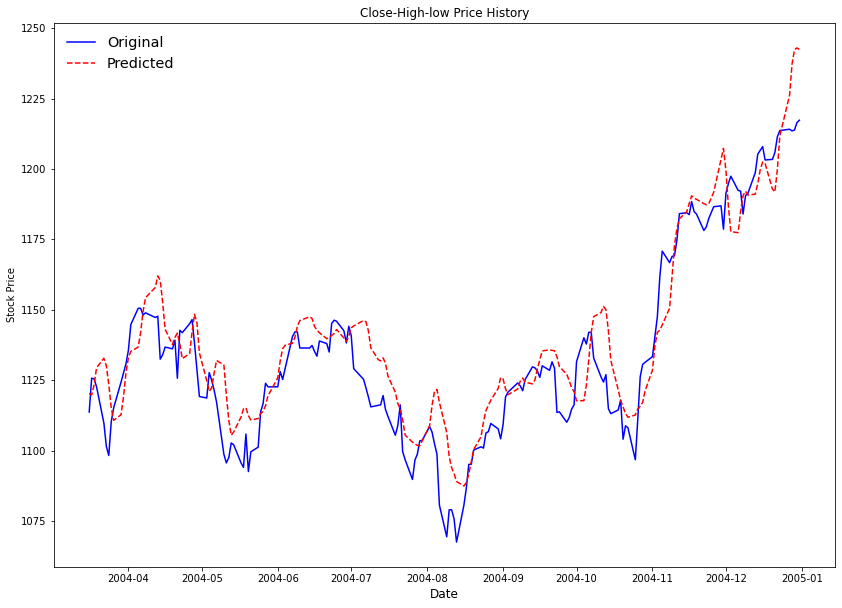

In [70]:
#--------------------------------------------plotting Original+Predicted High-------------------------------------
f, (ax1) = plt.subplots(1, figsize=(14,10))

#-------------------original----------------------
# First Subplot:"High Price History"
ax1.plot(sp_data.index[1054:], sp_data["High"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Close-High-low Price History")

#-------------------predicted----------------------
# Second Subplot:"High Price History"
ax1.plot(df_Result.index, df_Result["High"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

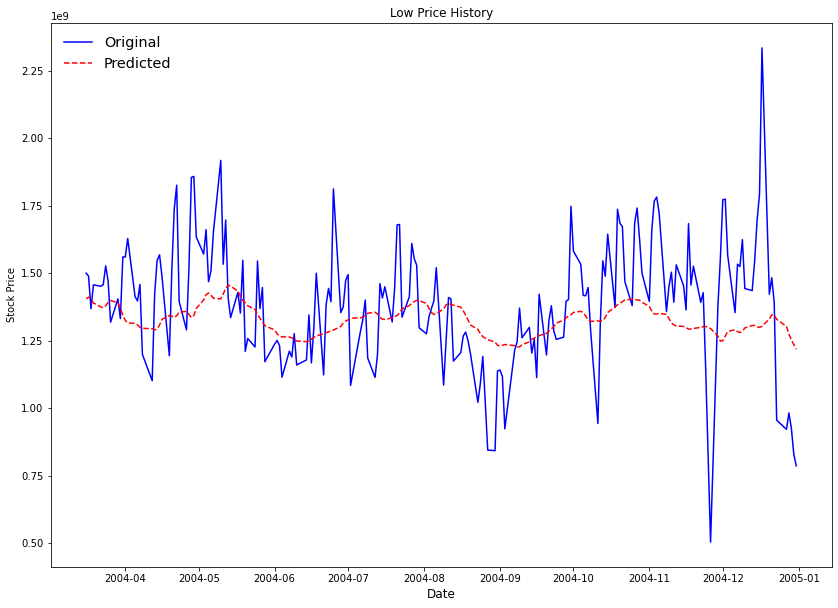

In [92]:
#--------------------------------------------plotting Original+Predicted Volume-------------------------------------
f, (ax1) = plt.subplots(1, figsize=(14,10))

#-------------------original----------------------
# First Subplot:"Volume Price History"
ax1.plot(sp_data.index[1054:], sp_data["Volume"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Volume Price History")

#-------------------predicted----------------------
# Second Subplot:"Volume Price History"
ax1.plot(df_Result.index, df_Result["Volume"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')

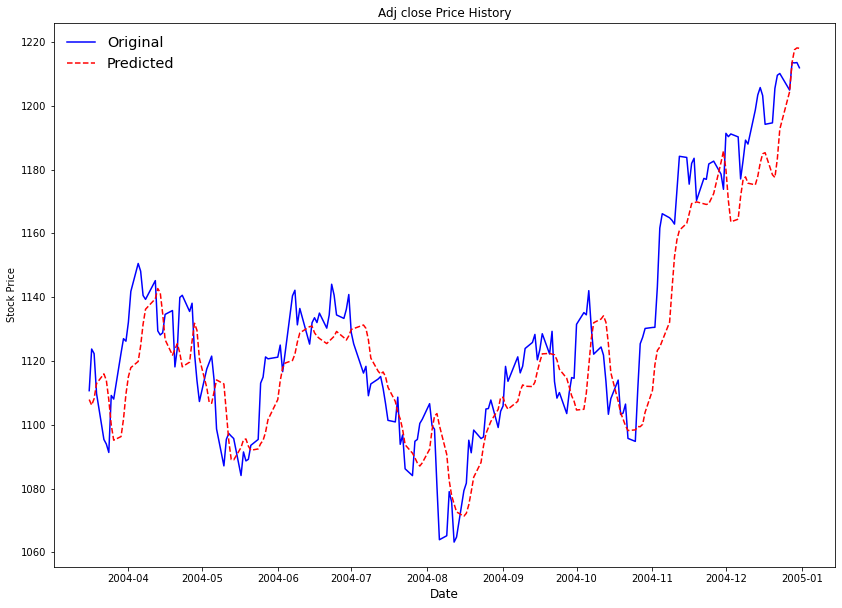

In [93]:
#--------------------------------------------plotting Original+Predicted Adj close-------------------------------------
f, (ax1) = plt.subplots(1, figsize=(14,10))

#-------------------original----------------------
# First Subplot:"Adj close Price History"
ax1.plot(sp_data.index[1054:], sp_data["Adj Close"][1054:], color="blue", label ='Original')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Adj close Price History")

#-------------------predicted----------------------
# Second Subplot:"Adj close Price History"
ax1.plot(df_Result.index, df_Result["Adj Close"],'r--', label ='Predicted')
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.legend(loc='upper left', frameon=False, fontsize='x-large')